# Evolutionary Simulations


This code simulates the spread of a beneficial gene, when it has a benefit of 2 percent in the number of offspring relative to not having the gene. 

[[0.01       0.99       1.         0.01      ]
 [0.0101     0.9801     0.9902     0.01019996]
 [0.010201   0.970299   0.9805     0.01040388]
 ...
 [1.41920177 0.00663685 1.42583862 0.9953453 ]
 [1.43339379 0.00657048 1.43996427 0.99543705]
 [1.44772772 0.00650478 1.4542325  0.995527  ]]


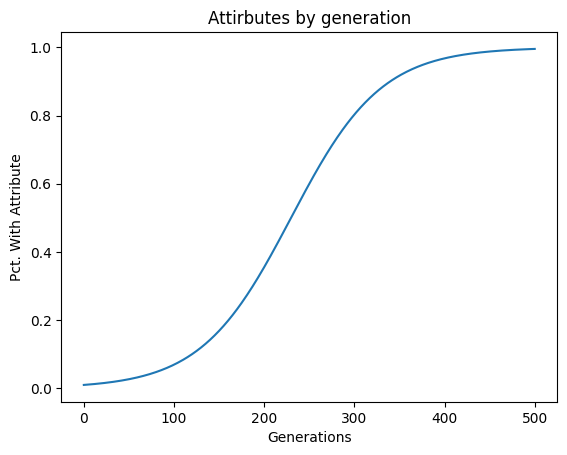

In [1]:
import numpy as np
import matplotlib.pyplot as plt
generations = 500
initial_pop_pct = 0.01
L_space = np.zeros((generations + 1, 4))
z = 0.01
v = -0.01
L_space[0, 0] = initial_pop_pct
L_space[0, 1] = 1 - L_space[0,0]
L_space[0, 2] = L_space[0,0] + L_space[0, 1]
L_space[0, 3] = L_space[0,0] / L_space[0,2]

for i in range(generations): 
    L_space[i + 1, 0] = (1 + z) * L_space[i,0]
    L_space[i + 1, 1] = (1 + v) * L_space[i,1]
    L_space[i + 1, 2] = L_space[i + 1, 0] + L_space[i + 1, 1]
    L_space[i + 1, 3] = L_space[i + 1,0] / L_space[i + 1,2]
print(L_space)
plt.plot(np.arange(generations + 1),L_space[:,3] )
plt.xlabel('Generations')
plt.ylabel('Pct. With Attribute')
plt.title('Attirbutes by generation')
plt.show()



## Stochastic Sticks & Markov Chains may Break my Bones 

Adding an N state markov chain, a population With 3 Animals, and prettier plotting. Adding a noise term. 

### Setup
Three animals, Lions, Anilopes & Buffalo.

The growth rate is given by the following
$$ L_{t+1} = (1 - \rho - \delta + \eta + \varepsilon) L_t$$

with $\rho$ the predation rate, $\delta$ is the natural death rate,  $\eta$ the birth rate, $\varepsilon$ is the shock term.

The birth rate is given by:
$$\eta = M / (2 * L_t)$$
With M the amount of nutritional value, and factored by 2 for a greater expence of repopulation compared to survival.

This is subject to a 3 state Hidden Markov Model. State 0 is the normal state, state 1 is a good year, while state 2 is a bad year. As there are 3 states and 3 animals, we have the following dimensions

- $L_t: (3 x 1)$
- $\rho: (3 x 1)$
- $\delta: (3 x 3)$
- $\eta: (3 x 3)$
- $\varepsilon: (3 x 1)$
- $M: (3 x 3)$




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


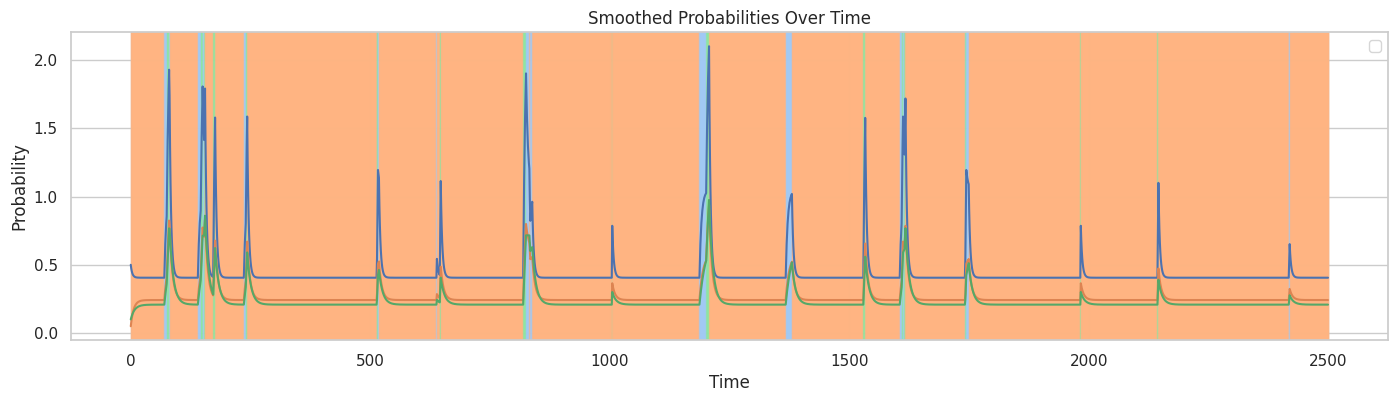

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Settings
# Time steps
T = 2500
# Number of States
N = 3
# Noise term

# Transition Matrix
diagonal = np.array((0.85, 0.991, 0.6))
transition_matrix = diagonal*np.eye(N) + (1 - diagonal) * (np.ones((N,N)) - np.eye(N)) / 2
transition_matrix = transition_matrix.T


# Select Hidden states
hidden_states = np.zeros(T)
hidden_states[0] = np.random.choice(N)


# Setup the Parameters!
# Populations Antilope, Buffalo, Lions
L = np.zeros((T,3))
L[0,:] = 0.5, 0.05, 0.1
# Predation Rate. 
rho = np.array((0.1, 0.1, 0.0))
# Natural Death Rate. Antilope ~ 7 years, Buffalo ~ 20 years, Lion ~ 10 years. 
    # Add array for normal, good, bad times
delta = np.zeros((N, N))
death_animal = np.array((0.125, 0.05, 0.1 ))
death_state = np.array((1, 1.5, 0.66 ))
delta = np.einsum('a,s->sa',death_animal,death_state)

# Food 
M = np.zeros((3,3))
M_animal = np.array((1.5, 1, 1))
M_state = np.array((1, 0.5, 2))
M = np.einsum('a,s->sa', M_animal, M_state) 

# Available Nutririon
A = np.zeros((T, 3, 3))
A[0,:,:] = M / (2 * L[0, :])

# Birth Rates
eta_natural = np.array((0.3, 0.15, 0.1)) 
eta = eta_natural * M

# Birth Rate History
B = np.zeros((T,3,3))
B[0,:,:] = eta_natural * A[0,:,:]
shock = np.array((0.01, 0.02, 0.03))

def plot_states(state_array, data):
    sns.set(style='whitegrid')
    # Unique number of states
    states = np.unique(state_array)
    # Find Colors
    colors = sns.color_palette('pastel', len(states))
    
    # Create a color map based on states
    state_colors = {state: colors[i] for i, state in enumerate(states)}
    # Plotting
    plt.figure(figsize=(17, 4))
    
    
    
    # Shade the background based on states
    for t in range(T):
        state = int(state_array[t])
        plt.axvspan(t, t+1, color=state_colors[state], alpha=0.6)
    #plt.plot(model.u_hat[0,:, 0], label=f'State {0}')
    plt.plot(L[:,:],)
    plt.title('Smoothed Probabilities Over Time')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()
    plt.savefig('Smoothed.png')
    plt.show()

# For the entire period:
for t in range(1, T):
    # Select Hidden State
    state = int(hidden_states[t-1])
    hidden_states[t] = np.random.choice(N, p = transition_matrix[state])

    # Determine Available Food
    A[t,:,:] = M / (2 * L[t-1, :])

    # Determine Current birthrates
    B[t,:,:] = eta_natural * A[t,:,:]
    # Determine population
    L[t,:] = (1 + B[t, state, :] + shock - rho - delta[state, : ]) * L[t-1, :]


plot_states(hidden_states,L)



$$ L_{t+1} = (1 - \rho - \delta + \eta + \varepsilon) L_t$$





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


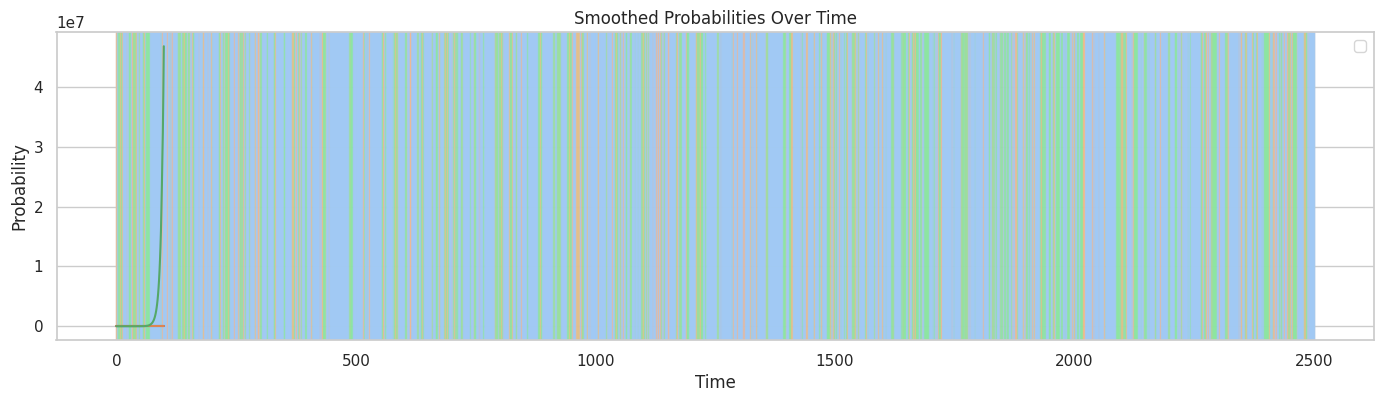

In [233]:
L = L[:100, :]
s = s[:100]
plot_states(hidden_states,L)

In [ ]:



# Simulation parameters
time_steps = 1000
initial_populations = {
    "lions": 50,
    "antelopes": 200,
    "buffaloes": 100,
}
sigma = 0.05  # Standard deviation of noise

# HMM setup
states = ["good", "moderate", "poor"]
n_states = len(states)
transition_probabilities = np.array([
    [0.8, 0.15, 0.05],
    [0.2, 0.6, 0.2],
    [0.05, 0.15, 0.8]
])

# Model the HMM
model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = np.array([0.34, 0.33, 0.33])
model.transmat_ = transition_probabilities

# Simulate the environmental states
observed_states = model.sample(time_steps)[1].ravel()

# Parameters for each state [good, moderate, poor]
birth_rates = {
    "antelopes": [0.1, 0.05, 0.02],
    "buffaloes": [0.05, 0.03, 0.01],
}
death_rates = {
    "lions": [0.02, 0.05, 0.1],
}
predation_rates = {
    "lions": {
        "antelopes": [0.005, 0.007, 0.009],
        "buffaloes": [0.007, 0.009, 0.011],
    }
}
nutrition_values = {
    "antelopes": 1,
    "buffaloes": 2,
}

# Initialize populations
populations = np.zeros((time_steps, 3))  # Lions, antelopes, buffaloes
populations[0, :] = list(initial_populations.values())

# Simulation loop
for t in range(1, time_steps):
    state = observed_states[t]
    
    # Update prey populations
    for prey, pop in zip(["antelopes", "buffaloes"], populations[t-1, 1:]):
        birth_rate = birth_rates[prey][state]
        prey_pop = pop + birth_rate * pop - predation_rates["lions"][prey][state] * populations[t-1, 0] * pop
        populations[t, 1 if prey == "antelopes" else 2] = max(0, prey_pop + np.random.normal(0, sigma * prey_pop))
    
    # Update predator population
    lion_pop = populations[t-1, 0]
    for prey in ["antelopes", "buffaloes"]:
        predation_effect = predation_rates["lions"][prey][state] * populations[t-1, 0] * populations[t-1, 1 if prey == "antelopes" else 2] * nutrition_values[prey]
        lion_pop += predation_effect
    lion_pop = lion_pop - death_rates["lions"][state] * lion_pop
    populations[t, 0] = max(0, lion_pop + np.random.normal(0, sigma * lion_pop))

# Plot results
plt.figure(figsize=(14, 7))
colors = ['orange', 'blue', 'green']
labels = ['Lions', 'Antelopes', 'Buffaloes']
state_colors = ['lightgreen', 'lightyellow', 'lightcoral']

for i, color in enumerate(colors):
    plt.plot(populations[:, i], color=color, label=labels[i])

# Shade background according to the state
for t in range(time_steps):
    plt.axvspan(t, t+1, facecolor=state_colors[observed_states[t]], alpha=0.3)

plt.title("Population dynamics with environmental states")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()



## K genes, and correlations?


## Cooperation

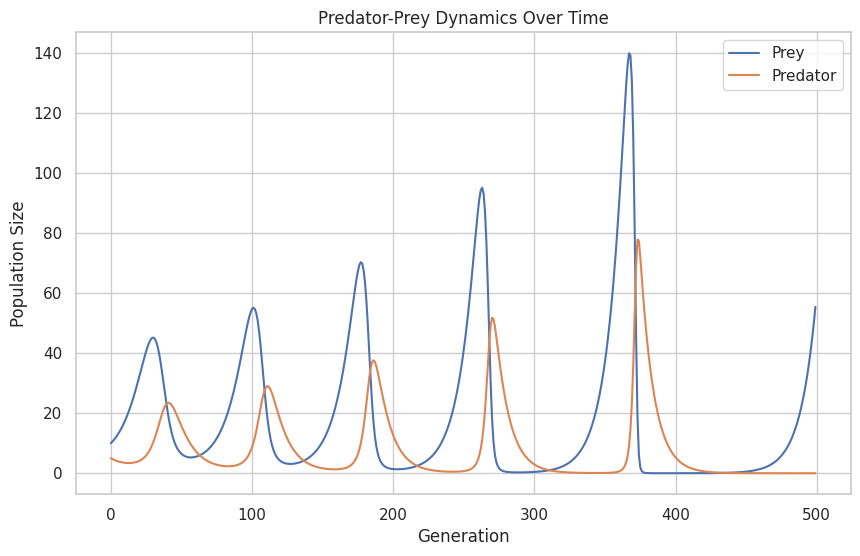

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
generations = 500
params = {
    'rx': 0.1,  # Prey growth rate
    'Kx': 1000,  # Carrying capacity of prey
    'axy': 0.01,  # Predation rate coefficient
    'ry': -0.1,  # Predator decrease rate in the absence of prey
    'byx': 0.005  # Predator growth rate per consumed prey
}
initial_populations = np.array([10, 5])  # Initial populations [prey, predator]

# Initialize state matrix
state = np.zeros((generations, 2))  # Each row: [prey_population, predator_population]
state[0, :] = initial_populations

# Simulate dynamics
for t in range(1, generations):
    x, y = state[t-1, 0], state[t-1, 1]
    x_next = x + params['rx'] * x * (1 - x / params['Kx']) - params['axy'] * x * y
    y_next = y + params['ry'] * y + params['byx'] * x * y
    state[t, :] = [x_next, y_next]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(state[:, 0], label='Prey')
plt.plot(state[:, 1], label='Predator')
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Predator-Prey Dynamics Over Time')
plt.legend()
plt.show()


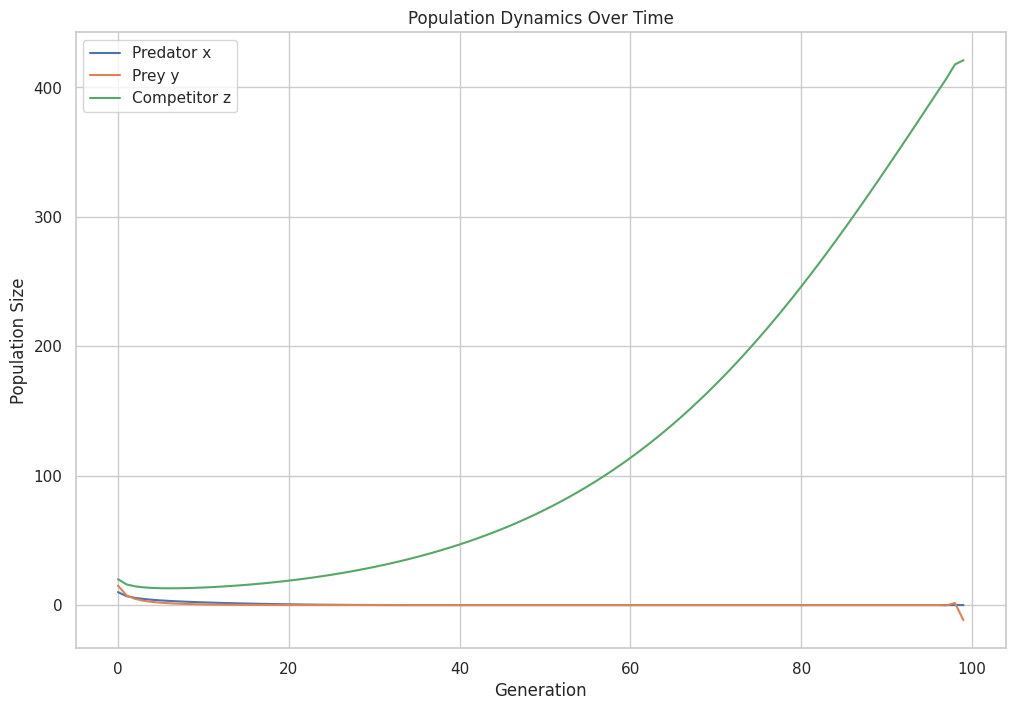

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
generations = 100
params = {
    'rx': 0.04, 'Kx': 1000, 'axy': 0.01, 'axz': 0.01,  # Predator x
    'ry': 0.1, 'Ky': 500, 'ayx': 0.02, 'ayz': 0.02,   # Prey y
    'rz': 0.05, 'Kz': 800, 'azx': 0.01, 'azy': 0.01   # Competitor z
}
initial_populations = np.array([10, 15, 20])  # Initial populations [x, y, z]

# Initialize state matrix
state = np.zeros((generations, 3))  # Each row: [x_population, y_population, z_population]
state[0, :] = initial_populations

# Simulation
for t in range(1, generations):
    x, y, z = state[t-1]
    x_next = x + params['rx'] * x * (1 - x / params['Kx']) - params['axy'] * x * y - params['axz'] * x * z
    y_next = y + params['ry'] * y * (1 - y / params['Ky']) - params['ayx'] * y * x - params['ayz'] * y * z
    z_next = z + params['rz'] * z * (1 - z / params['Kz']) - params['azx'] * z * x - params['azy'] * z * y
    state[t] = [x_next, y_next, z_next]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(state[:, 0], label='Predator x')
plt.plot(state[:, 1], label='Prey y')
plt.plot(state[:, 2], label='Competitor z')
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Population Dynamics Over Time')
plt.legend()
plt.show()
